---
## ESERCITAZIONE 1
---
### Punto 1 - Test della media di numeri pseudocasuali con distribuzione uniforme
Genero dei numeri pseudocasuali con distribuzione uniforme dal Random Number Generator. Verifico che siano "casuali" calcolandone la media e verificando che all'aumentare del numero di estrazioni questa tenda a 1/2, il valore aspettato.

Importo numpy e carico il file con i numeri casuali da analizzare

In [1]:
import matplotlib.pyplot as plt
#import matplotlib
import math
import numpy as np
r = np.loadtxt("./number.out", unpack= True, usecols=(0), skiprows=0)

definisco il codice

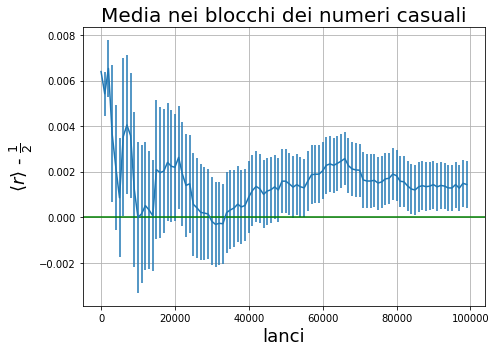

In [2]:

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

M=len(r)             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
# np.random.seed(1)     # Fixing random seed for reproducibility
# r = np.random.rand(M) # U[0,1) uniform distribution
x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N): #per ogni blocco
    sum1 = 0
    sum2 = 0 #PROVA per far vedere come si può sbagliare ad interpretare il calcolo di A_i^2
    for j in range(L): #per ogni numero casuale nel blocco
        k = j+i*L #k-esimo numero casuale dallo 0-esimo nello 0-esimo blocco
        sum1 += r[k] #somma dei numeri casuali nel blocco i
        sum2 += r[k]*r[k] #PROVA #somma dei quadrati dei numeri nel blocco
    ave[i] = sum1/L     # r_i media dei valori nel blocco i
    #av2[i] = sum2/L     # (r_i)^2 #PROVA media dei quadrati in un blocco
    av2[i] = (ave[i])**2 # (r_i)^2 quadrato della media

for i in range(N): #per ogni blocco
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average, ricalcolo ogni volta la media su tutti i blocchi
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
x*=L # Number of throws = block * (Number of throws in each block)

plt.figure(figsize=(7, 5))
plt.title("Media nei blocchi dei numeri casuali",fontsize=20)
plt.errorbar(x,sum_prog-0.5,yerr=err_prog) #plotto la media cumulativa
plt.xlabel(r"lanci", fontsize=18)
plt.axhline(y=0, xmin=0, xmax=1, color = 'green')
plt.ylabel(r"$\langle r \rangle$ - $\frac{1}{2}$", fontsize=18)
plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Distribuzione_numeri casuali.pdf")
plt.show()

## Punto 2 - test della deviazione standard della media di numeri pseudocasuali con distribuzione uniforme
Analogamente al punto precedente, verifico che la varianza di questi numeri tenda a 1/12 all'aumentare del numero di estrazioni.

Sovrascrivo i valori mantenendo lo stesso puntatore per occupare meno memoria (opzionale)

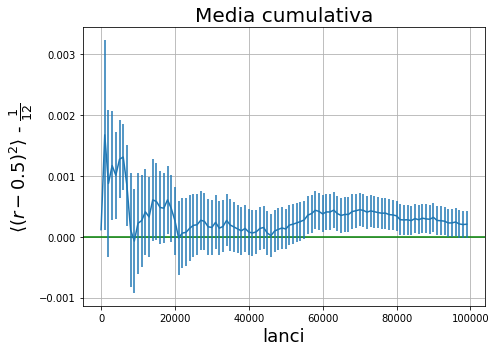

In [3]:
for i in range(N):
    ave[i] = 0
    av2[i] = 0
    sum_prog[i] = 0
    su2_prog[i] = 0
    err_prog[i] = 0

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += (r[k]-0.5)**2 # Accumulate measures
    ave[i] = sum/L           # Estimate in each block 
    av2[i] = (ave[i])**2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] 
        su2_prog[i] += av2[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty

plt.figure(figsize=(7, 5))
plt.axhline(y=0, xmin=0, xmax=1, color = 'green')
plt.title("Media cumulativa",fontsize=20)
plt.errorbar(x,sum_prog-1/12,yerr=err_prog) #plotto la media cumulativa
plt.xlabel(r"lanci", fontsize=18)
plt.ylabel(r"$\langle \left(r-0.5 \right)^{2} \rangle$ - $\frac{1}{12}$", fontsize=18)
plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Distribuzione_numeri casuali.pdf")
plt.show()

## Punto 3 - test del $\chi^{2}$
divido l'intervallo [0,1], range di estrazione dei numeri pseudo-casuali in sottointervalli. Per verificare l'uniformità, la probabilità che un numero estratto sia in ogni intervallino dev'essere uguale. $\\$
- Divido il dataset di $10^5$ numeri casuali in N=100 blocchi da L=1000 numeri per blocco
- Divido l'intervallo [0,1] dei numeri casuali in $n_{bins}=100$ intervalli 
- Calcolo il chi quadro per ogni blocco, utilizzando $L/n_{bins}$ come numero di eventi $atteso$ per ogni sottointervallo e $n_i$ come numero di numeri casuali effettivamente presenti in ogni sottointervallo (che quindi devo contare)
- Ho una distribuzione di N valori di chi quadro che plotto, e il cui valore medio dev'essere $L/n_{bins} \simeq 100$

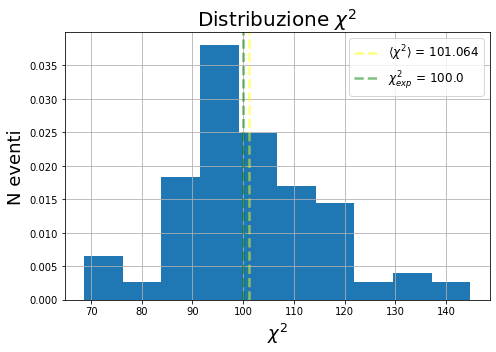

In [20]:
# Variabili già definite in precedenze ma le ridefinisco per poter runnare solo questa sezione invece di tutto il codice
M= len(r) # numero di numeri casuali
N=100 # numero di blocchi
L=int(M/N) # numero di numeri per blocco

n_bins = 100 # numero di bins in cui divido l'intervallo [0,1]

chi = [] # lista che conterrà i valori di chi quadro calcolati per ogni blocco

exp = int(L/n_bins) # valore aspettato di numeri casuali per ogni sottointervallo di [0,1]

# n_i è la lista che contiene il numero di valori osservato per ogni intervallino

for i in range(N): # per ogni blocco
    n_i,*useless=np.histogram(r[i*L:i*L+L], n_bins, (0,1)) # utilizzo la funzione histogram per contare il numero di eventi per ogni bins, ovvero intervallino
    chi.append(np.sum([(n-exp)**2/exp for n in n_i]))  # calcolo il chi quadro

media = np.mean(chi)

plt.figure(figsize=(7, 5))
plt.hist(chi, bins=10, density=True)

plt.axvline(media,label=r'$\leftangle \chi^{2} \rightangle$ = %.3f' %(media), color="yellow",alpha=0.5,ls='--', lw=2.5)
plt.axvline(100,label=r'$\chi^{2}_{exp}$ = %.1f' %(100), color="green",alpha=0.5,ls='--', lw=2.5)

plt.legend(loc='upper right', prop={'size': 12})

plt.title(r"Distribuzione $\chi^{2}$",fontsize=20)
plt.xlabel(r"$\chi^{2}$", fontsize=18)
plt.ylabel("N eventi", fontsize=18)

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Distribuzione_numeri casuali.pdf")
plt.show()

## Punto 2 - Distribuzioni di probabilità alternative
Utilizzo il metodo dell'inversa della cumulativa, in modo che utilizzo un numero casuale distribuito uniformemente tra 0 e 1 per ottenere un numero casuale distribuito con una certa distribuzione

In [5]:
import matplotlib.pyplot as plt
#import matplotlib
import math
import numpy as np
from scipy.stats import norm

# carico i dati di distribuzione standard, esponenziale e lorentziana
s, e, l= np.loadtxt("./number01.2.out", unpack= True, usecols=(0,1,2), skiprows=1)

In [21]:
# R è la distribuzione di numeri casuali da plottare,
# xlim sono i limiti (sx, dx) del grafico da plottare
# text è il titolo del grafico
def GraphPlotter(R, xlim, text):
        # Valori di S_N
    N = [100, 10, 2, 1]
    
    n_dati = int(1e4) #10^4 valori di S_N
    
    plt.figure(figsize=(7, 5))
    
    color = ['green', 'blue', 'yellow', 'red']
    for n,c in zip(N, color): # per ogni N degli S_N da fare
        S_N = [np.sum([R[j+i*n] for j in range(n)])/n for i in range(n_dati)]  #fissato N calcolo la lista di 10^4 valori
        h, bins, pathces = plt.hist(S_N, bins=np.linspace(*xlim, 100), density=True, color=c, alpha=1, label=f'N={n}')

        if n==100:
            mu, sigma = norm.fit(S_N)
            y = norm.pdf(bins, mu, sigma)
            plt.plot(bins, y, label = "Fit gaussiano", color='black')
            plt.plot(mu,0,linewidth=1, label=r'$\mu = %.2f $' %(mu), color="white")
            plt.plot(mu,0,linewidth=1, label=r'$\sigma = %.2f $' %(sigma), color="white")

    plt.legend(loc='upper right', prop={'size': 12})
    
    plt.title(text,fontsize=20)
    plt.xlabel(r"$S_N$", fontsize=18)
    plt.ylabel("N eventi", fontsize=18)
    
    plt.grid(True)
    plt.tight_layout() # per ridurre lo spazio bianco intorno
    # plt.savefig("Distribuzione_numeri casuali.pdf")
    plt.show()

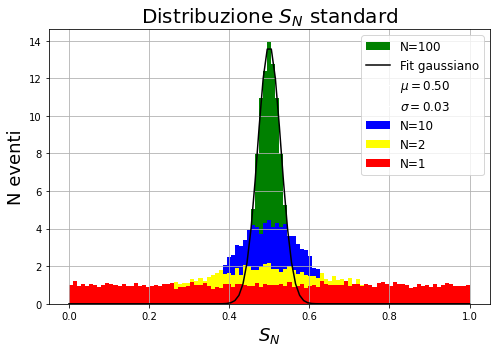

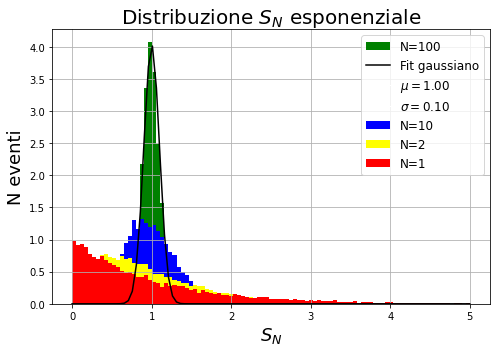

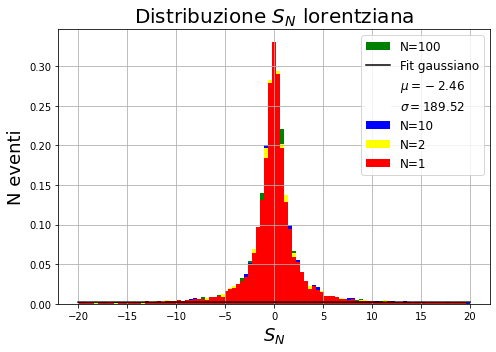

In [7]:
GraphPlotter(s, (0,1), "Distribuzione $S_N$ standard")
GraphPlotter(e, (0,5), "Distribuzione $S_N$ esponenziale")
GraphPlotter(l, (-20, 20), "Distribuzione $S_N$ lorentziana")

Si nota che nel primi due casi il teorema del limite centrale comporta che la distribuzione limite è una distribuzione gaussiana, nel secondo caso invece, proprio perché la distribuzione dei dati è lorentziana, la distribuzione limite è ancora una lorentziana. Si nota che si ha già per $N=1$ infatti i dati sono già distribuiti secondo una lorentziana.

# Punto 3 - Stima di $\pi$ con esperimento di Buffon
Si stima il valore di $\pi$ dai lanci di un ago di lunghezza $L$ su un insieme di linee equispaziate a distanza $d>L$. La probabilità che l'ago intersechi una delle linee è legata a $\pi$ dalla seguente relazione (con $P=\dfrac{n_{intersezioni}}{n_{lanci}}$):

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2 \cdot L \cdot N_{lanci}}{N_{int}\cdot d}$$

Nel sistema di riferimento considerato, le linee parallele sono orizzontali. Chiamo $x$ l'asse parallelo a queste linee e $y$ quello ortogonale a esse. $\\$
Il sistema è invariante per traslazioni lungo $x$ e simmetrico con periodo $d$ per traslazioni lungo $y$. Posso dunque considerare in modo equivalente che il sistema sia monodimensionale (guardo solo la direzione $y$) e che le linee siano solamente due. $\\$
Simulo i lanci casuali dell'ago generando un dataset di $10^5$ coppie di numeri. $\\$
Il primo rappresenta l'altezza $y$ del punto inferiore dell'ago rispetto alla linea inferiore (quindi si avrà $y \in [0,d]$), $\\$ 
mentre il secondo è l'angolo di inclinazione $\theta$ dell'ago rispetto all'asse parallelo alle linee ( $\theta \in [0, 2\pi)$). $\\$
La condizione di intersezione dell'ago con le linee si ha se: 
$$y+y_p \leq 0 \lor y+y_p \geq d$$
dove $y_p$ è la proiezione del punto superiore dell'ago sull'asse $y$, ovvero: $y_p = L\cdot\sin\theta$

Plotto quindi la stima di $\pi$ con deviazione std della media, al variare del numero di lanci e raggruppando i dati per blocchi

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# carico i dati dell'altezza y del punto inferiore dell'ago e del suo angolo d'inclinazione theta rispetto all'asse x
# OSS: l'angolo è in gradi
# OSS: y è in [0,1], quindi L < 1
y, theta = np.loadtxt("./number01.3.out", unpack= True, usecols=(0,1), skiprows=1)

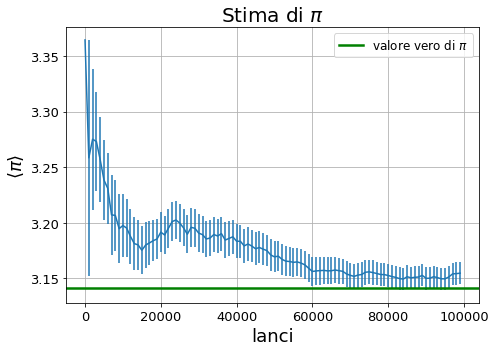

In [25]:
d = 1 # distanza tra le linee (ma dipende da come ho generato i dati casuali)
length = 0.9*d # lunghezza ago, calcolata come percentuale di d
M= len(y) # numero di numeri casuali
N=100 # numero di blocchi
L=int(M/N) # numero di lanci per blocco

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(N)      # [0,1,2,...,N-1]
x*=L # Numero di lanci = numero blocchi * Numero lanci per blocco

# funzione che calcola la deviazione standard della media a partire dalla media dei quadrati e dal quadrato della media
# in ingresso do' i due array delle quantità sopracitate ma cumulative, e l'indice n-esimo di cui calcolare la deviazione std
# questo corrisponde al calcolo di sigma dopo n blocchi
def error(AV,AV2,n): # sono array 
    if n==0:
        return 0
    else:
        return np.sqrt((AV2[n] - AV[n]**2)/n)

ave = np.zeros(N) # lista che conterrà la media cumulativa di pigreco al variare del numero N di blocchi utilizzato
av2 = np.zeros(N) # analogo ma contiene la media cumulativa al quadrato
sum_prog = np.zeros(N) # analogo ma è la somma cumulativa dei numeri casuali, per calcolo della dev std
su2_prog = np.zeros(N) # somma cumulativa dei quadrati dei numeri casuali, per calcolo della dev std
err_prog = np.zeros(N) # dev std cumulativa

# prima calcolo pi greco per ognuno degli N blocchi
for i in range(N): #per ogni blocco calcolo il valore d
    hit = 0
    for j in range(L): #per ogni numero casuale nel blocco
        k = j+i*L # k-esimo numero casuale dallo 0-esimo nello 0-esimo blocco ecc
        h = y[k] + length*np.sin(theta[k]/(2*np.pi)) # altezza dell'ago, uso il pi greco per la conversione in radianti :(

        if h <= 0 or h >= d:  # condizione d'intersezione con una delle due linee
            hit += 1 # conto un'intersezione in più

    ave[i] = (2*length*L)/(d*hit)     # valor medio di pi greco stimato nel blocco i
    av2[i] = (ave[i])**2 # (r_i)^2 quadrato della media di pi greco

# ora calcolo pi greco ma sommando in progressione il contributo di ogni blocco
for i in range(N): #per ogni blocco
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} pi_j , sommo tutte le medie di pigreco stimate fino al blocco i+1-esimo
        su2_prog[i] += av2[j] # SUM_{j=0,i} (pi_j)^2, sommo tutte le medie al quadrato dei pi greco stimati fino al blocco i+1-esimo
    sum_prog[i]/=(i+1) # calcolo la media cumulativa del valore di pi greco
    su2_prog[i]/=(i+1) # media dei quadrati cumulativa
    err_prog[i] = error(sum_prog,su2_prog,i) # Deviazione standard calcolata fino al blocco i-esimo
    
plt.figure(figsize=(7, 5))
plt.title("Stima di $\pi$",fontsize=20)

plt.errorbar(x,sum_prog,yerr=err_prog) #plotto la media cumulativa

plt.xlabel(r"lanci", fontsize=18)
plt.ylabel(r"$\langle \pi \rangle$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=np.pi, xmin=0, xmax=1, label=r'valore vero di $\pi$', lw = 2.5, color = 'green')

plt.legend(loc='upper right', prop={'size': 12})


plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
# plt.savefig("Stima_pigreco.pdf")
plt.show()